

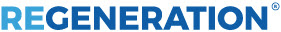



 

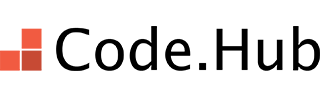

# Group Project March 2021
ReGeneration Academy on Big Data & Artificial Intelligence (powered by Microsoft) | A case study for predicting the price of an Airbnb listing in Athens using Microsoft Azure

## 5 Detailed Objectives
### 5.1 Extra EDA

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.graphics.mosaicplot import mosaic
sns.set_style("whitegrid")
import os


In [71]:
file = "data/listings.csv"
pathToFile = os.path.abspath('') + "/" + file
data = pd.read_csv(file)

## Time series

In Figure 1 we see the change in the number of hosts from 2009 until 2021. 

In [72]:
data_time = data[['host_since','host_id']].dropna()
data_time= data_time.groupby(["host_since"])['host_id'].nunique()
data_time.index = pd.to_datetime(data_time.index)
data_time = data_time.sort_index()
data_time= data_time.to_frame(name = 'Hosts')
sum_time = 0
for i in data_time.index:
    data_time.loc[i,'sum_hosts'] = data_time.loc[i,'Hosts'] + sum_time
    sum_time = data_time.loc[i,'sum_hosts']

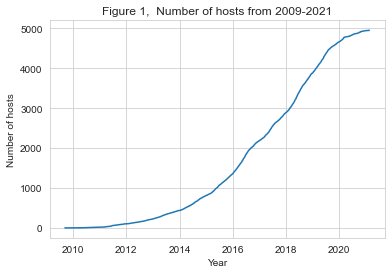

In [73]:
#plot time series 
sns.lineplot(data=data_time['sum_hosts']).set_title('Figure 1,  Number of hosts from 2009-2021')
plt.xlabel('Year')
plt.ylabel('Number of hosts')
plt.show()



## Price

The histogram of the price has constructed (see Figure 2). We see that it is a right skew distribution. For better visualization the same histogram was constructed filtering the dataset for prices less than 200 dollars  (see Figure 3). From the corresponding boxplots we see that there are outliers (values out of the whiskers). Also the descriptive statistics of the price variable have been calculated. There are listings with price 8000 dollars.  

Descriptive statistics for the price : 
Mean : 73.42621738671174 
Standard Deviation : 336.271607862563 
Median : 43.0 
Max : 8000.0 
Min : 7.0


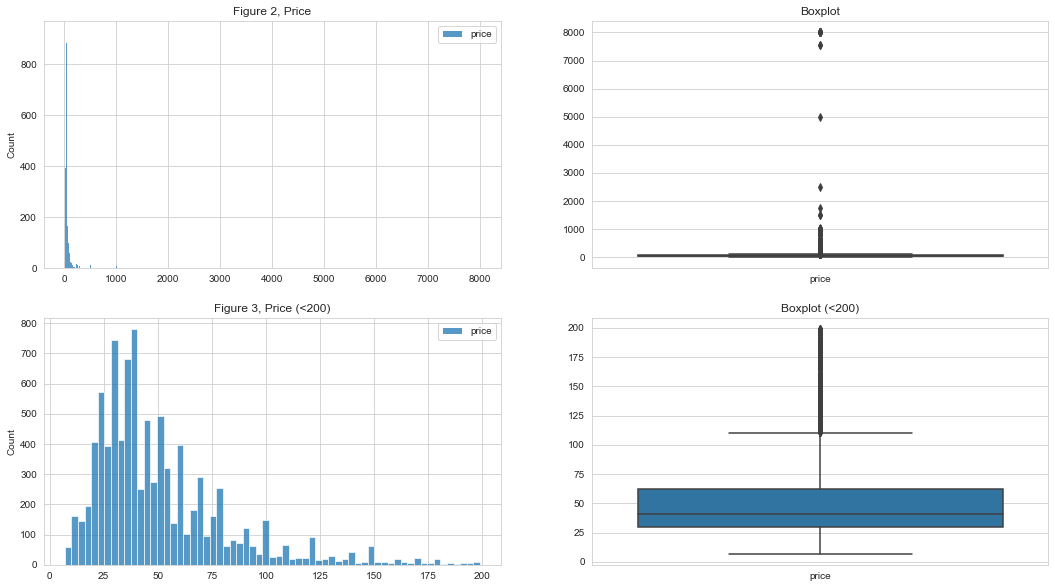

In [74]:
#price column to float
data["price"] = data['price'].str.replace(',', '').str.replace('$', '').astype(float)

#drop missing values
price_1 = data["price"].dropna()
print("Descriptive statistics for the price : \nMean : {} \nStandard Deviation : {} \nMedian : {} \nMax : {} \nMin : {}".format(price_1.mean(),price_1.std(),np.median(price_1), max(price_1), min(price_1)))
price_1 = price_1.to_frame()
price_filter= price_1[price_1['price']<200]

#histogram and boxplot (for all the data set and filtering for price < 200) 
fig, axes = plt.subplots(2,2,figsize=(18, 10))
sns.histplot(ax = axes[0,0], data = price_1)
axes[0,0].set_title('Figure 2, Price')
sns.boxplot(ax = axes[0,1], data = price_1)
axes[0,1].set_title('Boxplot')
sns.histplot(ax = axes[1,0], data = price_filter)
axes[1,0].set_title('Figure 3, Price (<200)')
sns.boxplot(ax = axes[1,1], data = price_filter)
axes[1,1].set_title('Boxplot (<200)')
plt.show()


## Relationship between price and number of reviews

To examine graphically the relationship between price and number of reviews the corresponding scatterplot was constructed (see Figure 4). As above for better visualization the same scatterplot was constructed filtering the dataset for prices less than 100 dollars (see Figure 5). As we see there are listings with the same number of reviews, but with their corresponding prices differ within a large range of price values. 

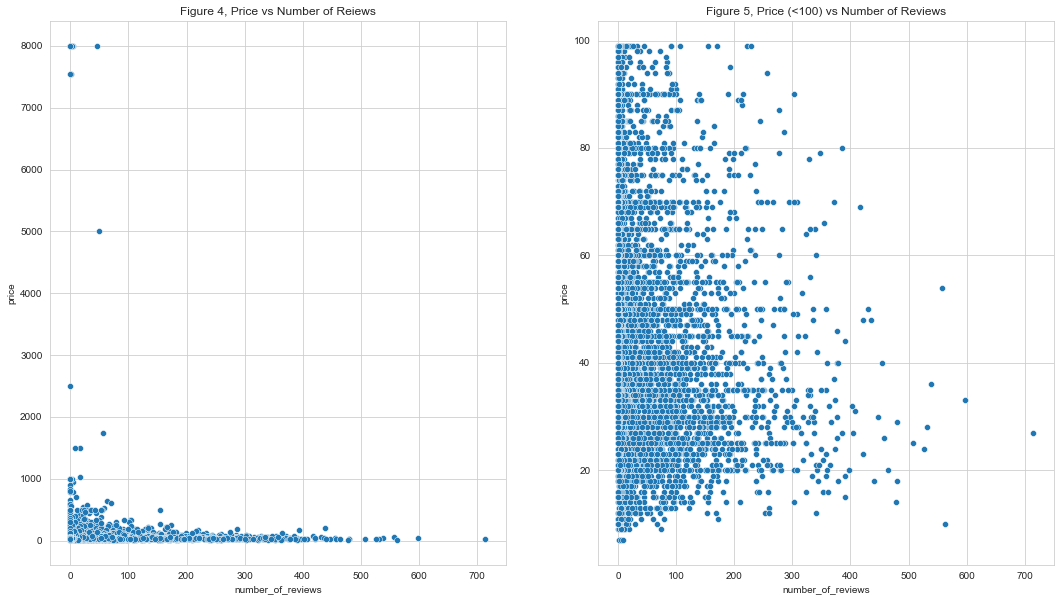

In [75]:
#price vs number_of_reviews
data_1 = data[["number_of_reviews","price"]].dropna()
data_1_filter = data_1[data_1["price"]<100]


#price vs review_score_rating, vale kai colourmap
data_2 = data[["review_scores_rating","price"]].dropna()
data_2_drop_outliers = data_2[data_2["price"]<100]

#scatterplots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.scatterplot(ax = axes[0], x = "number_of_reviews", y = "price", data = data_1)
axes[0].set_title('Figure 4, Price vs Number of Reiews')
sns.scatterplot(ax = axes[1], x = "number_of_reviews", y = "price" , data = data_1_filter)
axes[1].set_title('Figure 5, Price (<100) vs Number of Reviews')
plt.show()


## Relationship between price and review scores ratings

As we can see from the scatterplot for the prices less than 100 dollars (see Figure 7) there are listings with the max value of review score rating (100), but the prices are distributed within all the range of price values. Maybe this scatterplot indicates that there is no relatioship between these two variables, but visualization is not enough for such a conclusion.

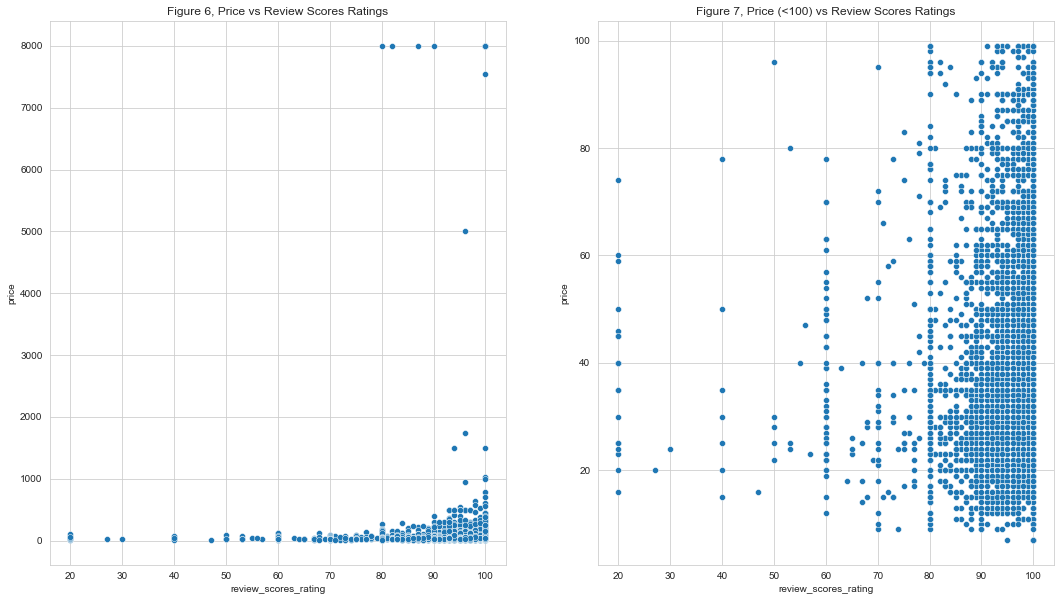

In [76]:
data_2 = data[["review_scores_rating","price"]].dropna()
data_2_drop_outliers = data_2[data_2["price"]<100]
#scatterplot
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.scatterplot(ax = axes[0], x = "review_scores_rating", y = "price", data = data_2)
axes[0].set_title('Figure 6, Price vs Review Scores Ratings')
sns.scatterplot(ax = axes[1], x = "review_scores_rating", y = "price" , data = data_2_drop_outliers)
axes[1].set_title('Figure 7, Price (<100) vs Review Scores Ratings')
plt.show()

##  Price for the different values of review score cleanliness

Below we can see the distribution of price for the different values of review score cleanliness. For listings with price less than 100 dollars (see Figure 9) we see that some listings with lower score at clenliness have almost the same range of price values. 

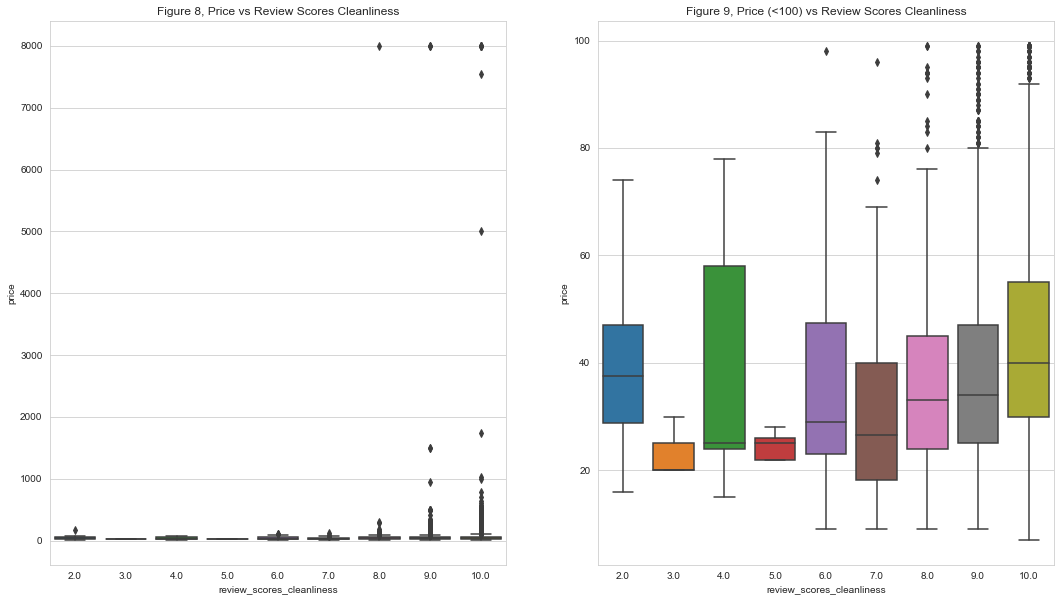

In [77]:
data_3 = data[["review_scores_cleanliness","price"]].dropna()
data_3_drop_outliers = data_3[data_3["price"]<100]
#boxplots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.boxplot(ax = axes[0], x = "review_scores_cleanliness", y = "price", data = data_3)
axes[0].set_title('Figure 8, Price vs Review Scores Cleanliness')
sns.boxplot(ax = axes[1], x = "review_scores_cleanliness", y = "price" , data = data_3_drop_outliers)
axes[1].set_title('Figure 9, Price (<100) vs Review Scores Cleanliness')
plt.show()


## Price for the different room types

Boxplots  have constructed to examine the distribution of prices for the different room types. As we can see for listings with prices less than 100 dollars hotel rooms have a bigger range of price values, while shared rooms have the most narrow range.

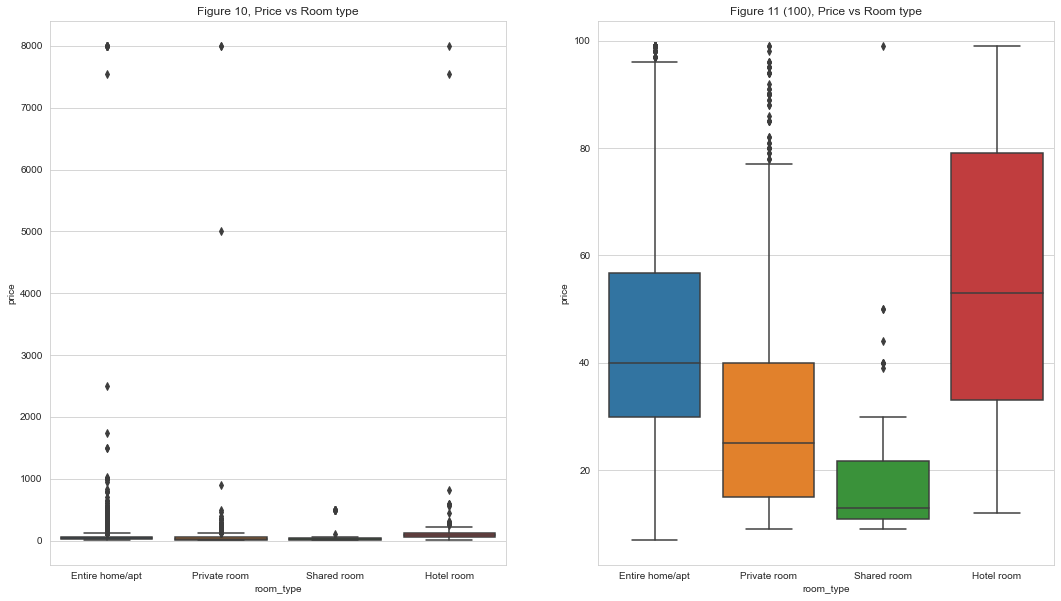

In [78]:
data_4 = data[["room_type","price"]].dropna()
data_4_drop_outliers = data_4[data_4["price"]<100]
#boxplots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.boxplot(ax = axes[0], x = "room_type", y = "price", data = data_4)
axes[0].set_title('Figure 10, Price vs Room type')
sns.boxplot(ax = axes[1], x = "room_type", y = "price" , data = data_4_drop_outliers)
axes[1].set_title('Figure 11 (100), Price vs Room type')
plt.show()


## Price if host is superhost or not

From the boxplots below we notice that prices are distributed the same (concerning the descriptive statistics) without depending if host is superhost or not (see Figure 12,13).

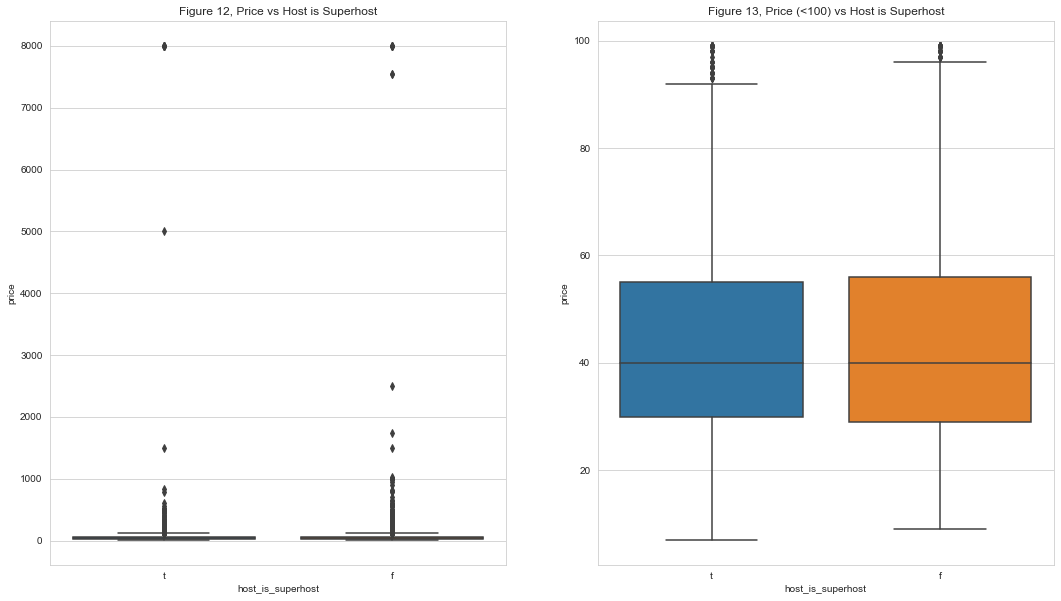

In [79]:
data_5 = data[["host_is_superhost","price"]].dropna()
data_5_drop_outliers = data_5[data_5["price"]<100]
#boxplots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.boxplot(ax = axes[0], x = "host_is_superhost", y = "price", data = data_5)
axes[0].set_title('Figure 12, Price vs Host is Superhost')
sns.boxplot(ax = axes[1], x = "host_is_superhost", y = "price" , data = data_5_drop_outliers)
axes[1].set_title('Figure 13, Price (<100) vs Host is Superhost')
plt.show()

## Prices depending on if the listing is instant bookable or not 

From the boxplots below we notice that prices are distributed almost the same (concerning the descriptive statistics) without depending on if host is superhsot or not. 

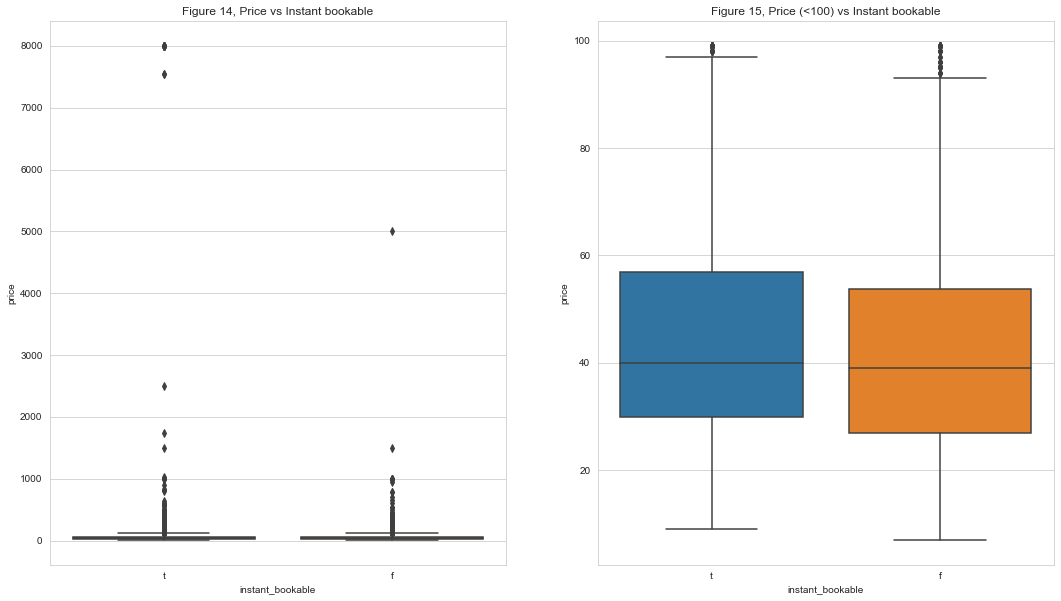

In [80]:
data_6 = data[["instant_bookable","price"]].dropna()
data_6_drop_outliers = data_6[data_6["price"]<100]
#boxplots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.boxplot(ax = axes[0], x = "instant_bookable", y = "price", data = data_6)
axes[0].set_title('Figure 14, Price vs Instant bookable')
sns.boxplot(ax = axes[1], x = "instant_bookable", y = "price" , data = data_6_drop_outliers)
axes[1].set_title('Figure 15, Price (<100) vs Instant bookable')
plt.show()

## Price depending on host's response time

Below we see price's distribution for all the levels of the categorical variable that describes how long it takes the host to respond at a book request.

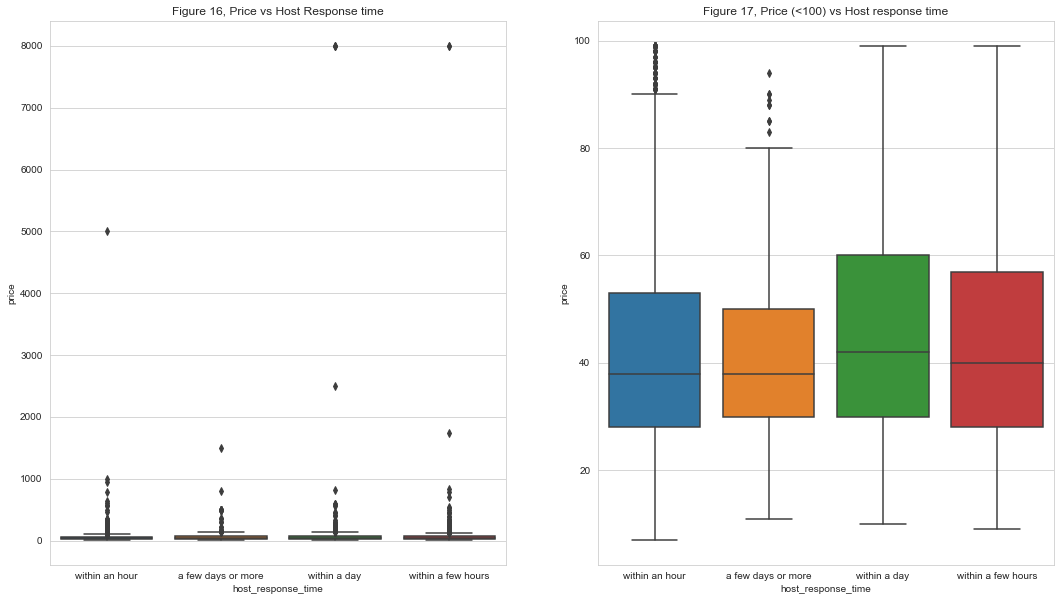

In [81]:
data_7 = data[["host_response_time","price"]].dropna()
data_7_drop_outliers = data_7[data_7["price"]<100]
#boxplots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.boxplot(ax = axes[0], x = "host_response_time", y = "price", data = data_7)
axes[0].set_title('Figure 16, Price vs Host Response time')
sns.boxplot(ax = axes[1], x = "host_response_time", y = "price" , data = data_7_drop_outliers)
axes[1].set_title('Figure 17, Price (<100) vs Host response time')
plt.show()

## Number of reviews

The histogram for the number of reviews has been constructed (see Figure 18). We see that it is a right skew distribution. We notice that the majority of listings have 0 number of reviews. The corresponding descriptive statistics have been calculated. 

Descriptive statistics for the Number of reviews : 
Mean : 37.46751874933981 
Standard Deviation : 64.48830163815859 
Median : 9.0 
Max : 715 
Min : 0


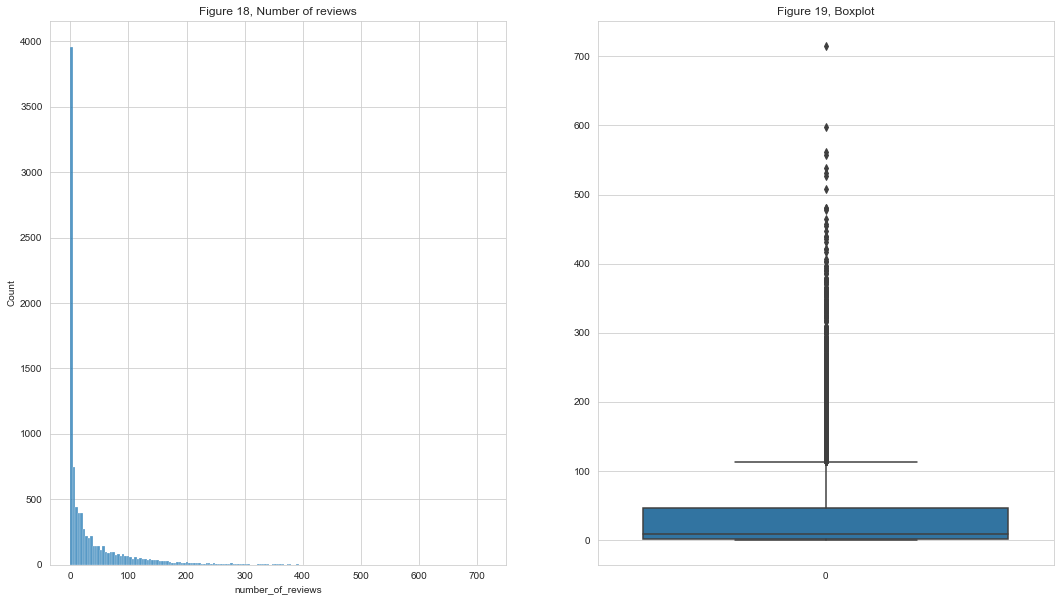

In [82]:
#drop missing values
number_of_reviews = data["number_of_reviews"].dropna()
#descriptive statistics 
print("Descriptive statistics for the Number of reviews : \nMean : {} \nStandard Deviation : {} \nMedian : {} \nMax : {} \nMin : {}".format(number_of_reviews.mean(),number_of_reviews.std(),np.median(number_of_reviews), int(max(number_of_reviews)), int(min(number_of_reviews))))
#histogram and boxplot 
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.histplot(ax = axes[0], data = number_of_reviews)
axes[0].set_title('Figure 18, Number of reviews')
sns.boxplot(ax = axes[1], data = number_of_reviews)
axes[1].set_title('Figure 19, Boxplot')
plt.show()



## Score Ratings

The histogram from the score ratings has been constructed (see Figure 20). We see that it is a left skew distribution. We notice that the majority of listings have a high score rating. The corresponding descriptive statistics have been calculated.

Descriptive statistics for the review score ratings : 
Mean : 95.17543859649123 
Standard Deviation : 7.742873190368093 
Median : 97.0 
Max : 100 
Min : 20


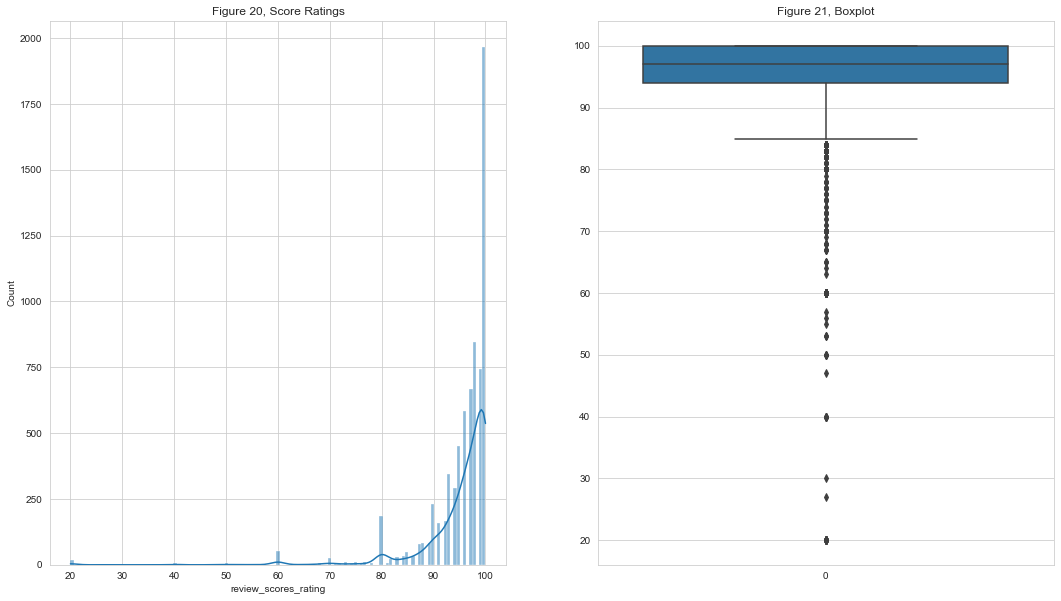

In [83]:
#drop missing values
review_scores_rating = data["review_scores_rating"].dropna()
#descriptive statistics 
print("Descriptive statistics for the review score ratings : \nMean : {} \nStandard Deviation : {} \nMedian : {} \nMax : {} \nMin : {}".format(review_scores_rating.mean(),review_scores_rating.std(),np.median(review_scores_rating), int(max(review_scores_rating)), int(min(review_scores_rating))))
#histogram and boxplt 
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.histplot(ax = axes[0], data = review_scores_rating, kde = True)
axes[0].set_title('Figure 20, Score Ratings')
sns.boxplot(ax = axes[1], data = review_scores_rating)
axes[1].set_title('Figure 21, Boxplot')
plt.show()



## Review scores cleanliness

The most frequent value for the cleanliness score was 10 (max) (see Figure 22).

Descriptive statistics for the review scores cleanliness : 
Mean : 9.631462231462232 
Standard Deviation : 0.8008743898963095 
Median : 10.0 
Mode : 10 
Max : 10 
Min : 2


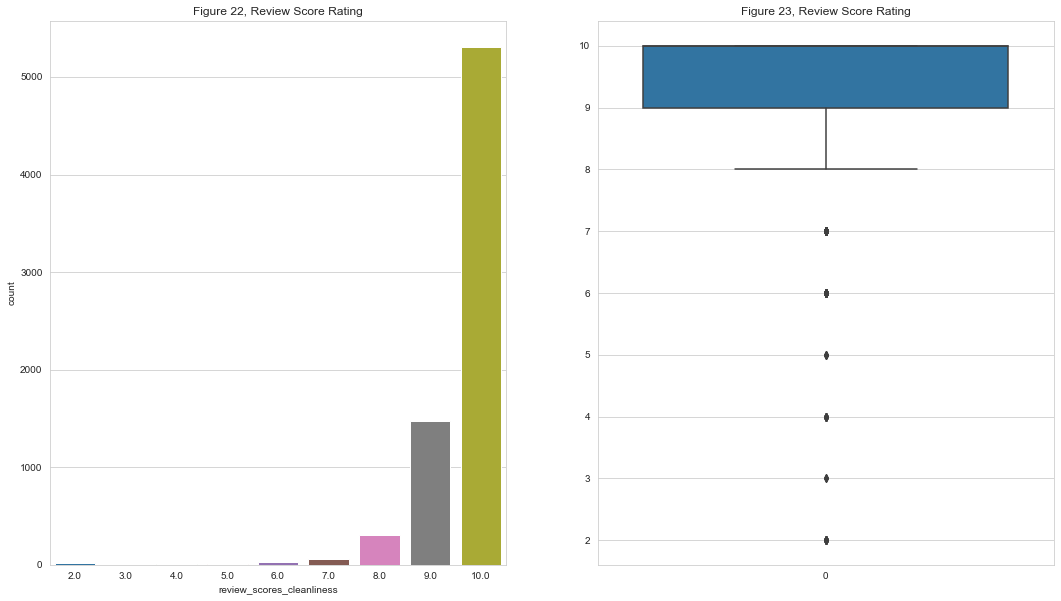

In [84]:
#drop missing values
review_scores_cleanliness = data["review_scores_cleanliness"].dropna()
#descriptive statistics 
print("Descriptive statistics for the review scores cleanliness : \nMean : {} \nStandard Deviation : {} \nMedian : {} \nMode : {} \nMax : {} \nMin : {}".format(review_scores_cleanliness.mean(),review_scores_cleanliness.std(),np.median(review_scores_cleanliness),int(review_scores_cleanliness.mode()[0]), int(max(review_scores_cleanliness)), int(min(review_scores_cleanliness))))
#countplot and boxplot 
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.countplot(ax = axes[0], x = review_scores_cleanliness)
axes[0].set_title('Figure 22, Review Score Rating')
sns.boxplot(ax = axes[1], data = review_scores_cleanliness)
axes[1].set_title('Figure 23, Review Score Rating')
plt.show()


## Other variables of the dataset

Below countplots and frequency tables has been constructed for other variables of the dataset, especially the categorical ones (see Figures 24-31). 

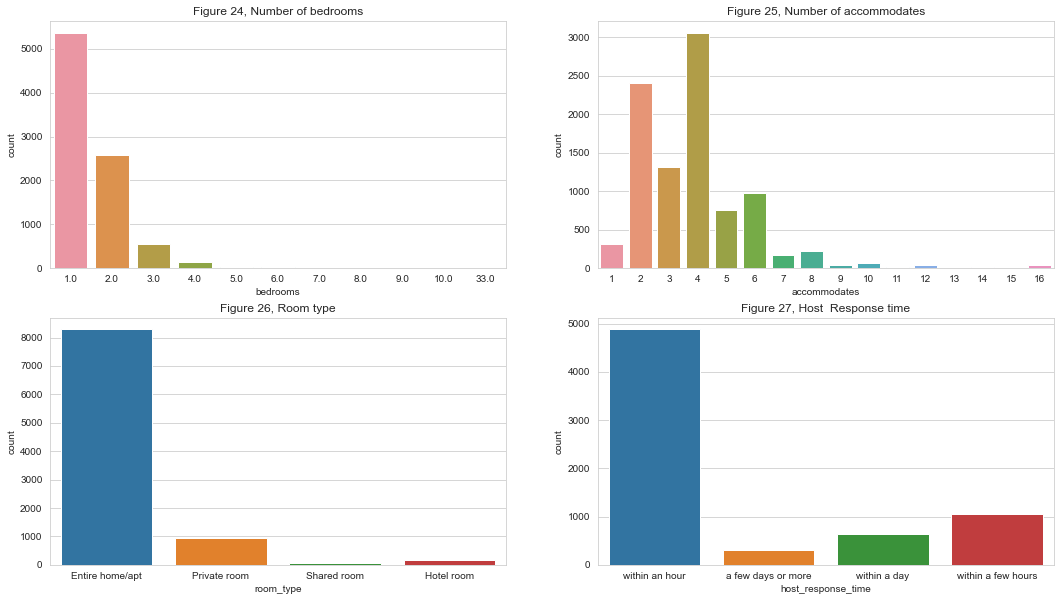

In [85]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
#drop missing vaues, Bedrooms
bedrooms = data["bedrooms"].dropna()
sns.countplot(ax = axes[0,0], x = bedrooms)
axes[0,0].set_title('Figure 24, Number of bedrooms')


#drop missing values, Accommodates
accommodates = data["accommodates"].dropna()
sns.countplot(ax = axes[0,1], x = accommodates)
axes[0,1].set_title('Figure 25, Number of accommodates')


#drop missing values, Room type
room_type = data["room_type"].dropna()
sns.countplot(ax = axes[1,0], x = room_type)
axes[1,0].set_title('Figure 26, Room type')


#drop missing values, Host's response time
host_response_time = data["host_response_time"].dropna()
sns.countplot(ax = axes[1,1], x = host_response_time)
axes[1,1].set_title('Figure 27, Host  Response time')
plt.show()


Text(0.5, 1.0, 'Figure 29, Host has profile picture')

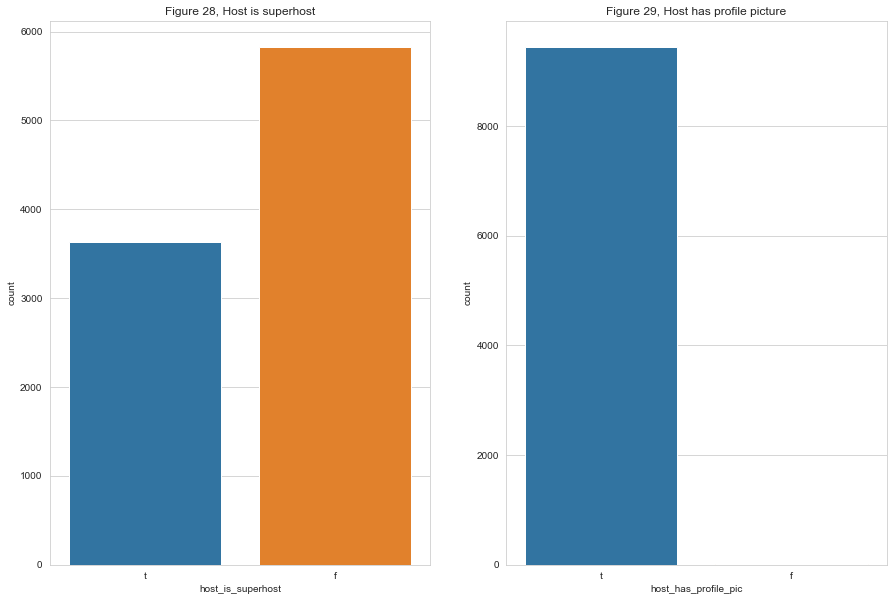

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
#drop missing values, Host is superhost
host_is_superhost = data["host_is_superhost"].dropna()
sns.countplot(ax = axes[0], x = host_is_superhost)
axes[0].set_title('Figure 28, Host is superhost')



#drop missing values, Host has profile picture
host_has_profile_pic = data["host_has_profile_pic"].dropna()
sns.countplot(ax = axes[1], x = host_has_profile_pic)
axes[1].set_title('Figure 29, Host has profile picture')
                

                  

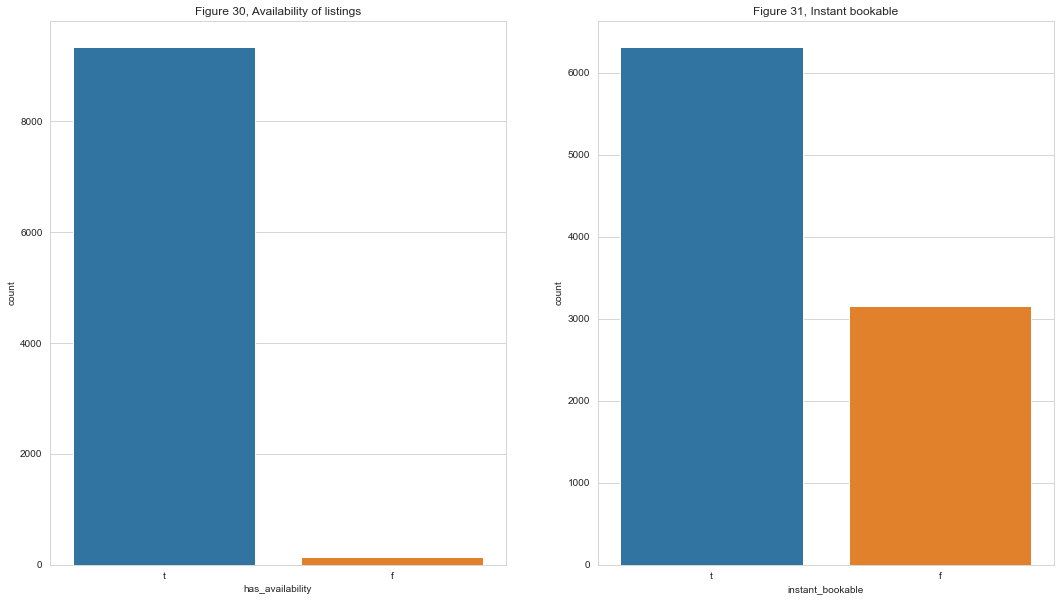

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

#drop missing values, Availability of listing
has_availability = data["has_availability"].dropna()
sns.countplot(ax = axes[0], x = has_availability)
axes[0].set_title('Figure 30, Availability of listings')

#drop missing values, Instant bookable
instant_bookable = data["instant_bookable"].dropna()
sns.countplot(x = instant_bookable)
axes[1].set_title('Figure 31, Instant bookable')

plt.show()




## Geomap listings per host


In [89]:
#cleaning some data
data = pd.read_csv(file)
data['price2'] = data['price'].str.replace(',', '').str.replace('$', '').astype(float)


def color_mapping(price):
    '''
    Input :  price
    Output : Mapped color to price
    '''


    if price<=20:
        colors='green'

    elif price>20 and price<=40:
        colors='blue'
    elif price>40 and price<=60:
        colors='yellow'
    elif price>60 and price<=80:
        colors='orange'
    else:
        colors='red'
    return colors

#apply the color_mapping function into dataframe
data['colors'] = data.apply(lambda x: color_mapping(x['price2']), axis=1)
data['colors'].value_counts()

#plotting MapBox
import plotly.express as px
fig = px.scatter_mapbox(data, lat="latitude", lon="longitude",
                        hover_name="neighbourhood_cleansed",
                        hover_data=["host_name", "price"],
                        color_discrete_sequence=[data['colors']],color_continuous_scale=px.colors.cyclical.IceFire, zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(coloraxis_showscale=True)

fig.show()